In [1]:
import talib as ta
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# MACD Profitability Using Daily SPY Data

In [2]:
sp_d = yf.download('^GSPC')['Close'].to_frame()

[*********************100%%**********************]  1 of 1 completed


In [3]:
macd, macdsignal, macdhist = ta.MACD(sp_d.Close, fastperiod=50, slowperiod=100, signalperiod=25)

In [4]:
sp_d['macd_hist'] = macdhist

In [5]:
sp_d['daily_profit_long_short'] =list(map(lambda x: (sp_d.iloc[x, 0] - sp_d.iloc[max(x-1, 0), 0]) * np.abs(sp_d.iloc[x-1,1])/sp_d.iloc[x-1,1] , range(sp_d.shape[0])))

In [6]:
sp_d['daily_profit_long'] = list(map(lambda x: (sp_d.iloc[x, 0] - sp_d.iloc[max(x-1, 0), 0]) if sp_d.iloc[x-1,1] > 0 else 0 , range(sp_d.shape[0])))

In [7]:
sp_d['daily_profit_short'] = list(map(lambda x: (sp_d.iloc[x, 0] - sp_d.iloc[max(x-1, 0), 0]) * -1 if sp_d.iloc[x-1,1] < 0 else 0 , range(sp_d.shape[0])))

In [8]:
sp_d['cum_profit_long_short'] = sp_d['daily_profit_long_short'].cumsum()

In [9]:
sp_d['cum_profit_long'] = sp_d['daily_profit_long'].cumsum()

In [10]:
sp_d['cum_profit_short'] = sp_d['daily_profit_short'].cumsum()

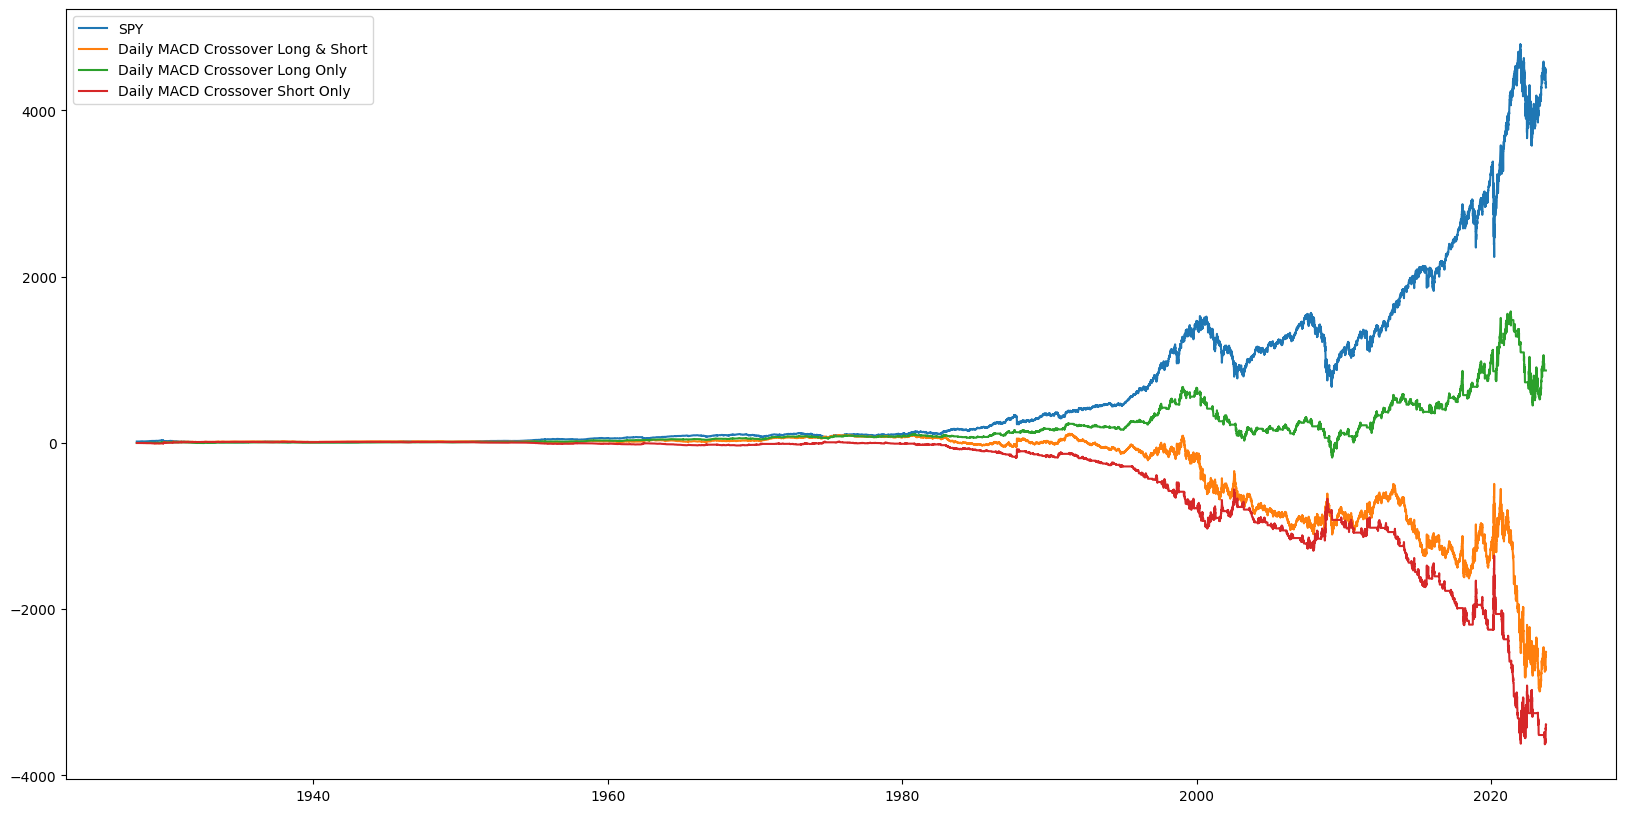

In [11]:
plt.figure(figsize=(20,10))
plt.plot(sp_d.Close, label = 'SPY')
plt.plot(sp_d.cum_profit_long_short, label = 'Daily MACD Crossover Long & Short')
plt.plot(sp_d.cum_profit_long, label = 'Daily MACD Crossover Long Only')
plt.plot(sp_d.cum_profit_short, label = 'Daily MACD Crossover Short Only')
plt.legend()

# MACD Profitability Using Weekly SPY Data

In [12]:
sp_w = yf.download('^GSPC')['Close'][4::5].to_frame()

[*********************100%%**********************]  1 of 1 completed


In [13]:
macd, macdsignal, macdhist = ta.MACD(sp_w.Close, fastperiod=12, slowperiod=26, signalperiod=9)

In [14]:
sp_w['macd_hist'] = macdhist

In [15]:
sp_w['daily_profit_long_short'] =list(map(lambda x: (sp_w.iloc[x, 0] - sp_w.iloc[max(x-1, 0), 0]) * np.abs(sp_w.iloc[x-1,1])/sp_w.iloc[x-1,1] , range(sp_w.shape[0])))

In [16]:
sp_w['daily_profit_long'] = list(map(lambda x: (sp_w.iloc[x, 0] - sp_w.iloc[max(x-1, 0), 0]) if sp_w.iloc[x-1,1] > 0 else 0 , range(sp_w.shape[0])))

In [17]:
sp_w['daily_profit_short'] = list(map(lambda x: (sp_w.iloc[x, 0] - sp_w.iloc[max(x-1, 0), 0]) * -1 if sp_w.iloc[x-1,1] < 0 else 0 , range(sp_w.shape[0])))

In [18]:
sp_w['cum_profit_long_short'] = sp_w['daily_profit_long_short'].cumsum()

In [19]:
sp_w['cum_profit_long'] = sp_w['daily_profit_long'].cumsum()

In [20]:
sp_w['cum_profit_short'] = sp_w['daily_profit_short'].cumsum()

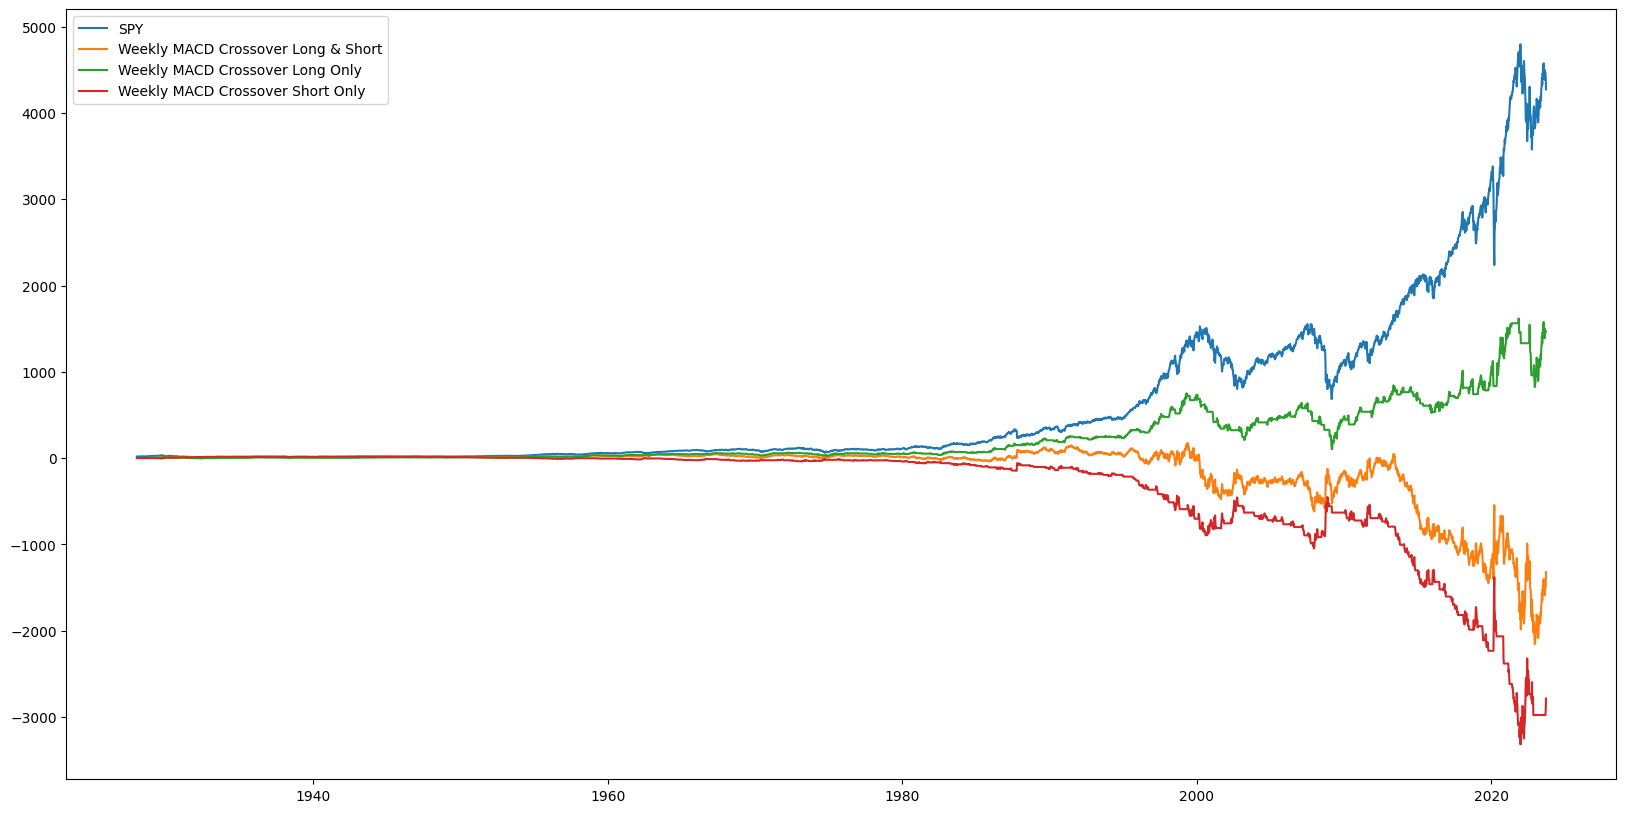

In [21]:
plt.figure(figsize=(20,10))
plt.plot(sp_w.Close, label = 'SPY')
plt.plot(sp_w.cum_profit_long_short, label = 'Weekly MACD Crossover Long & Short')
plt.plot(sp_w.cum_profit_long, label = 'Weekly MACD Crossover Long Only')
plt.plot(sp_w.cum_profit_short, label = 'Weekly MACD Crossover Short Only')
plt.legend()